In [1]:
from sklearn.datasets import load_diabetes

In [2]:
dataset = load_diabetes()

In [4]:
print(dataset.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [5]:
import pandas as pd
df_diabetes = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [6]:
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [7]:
# Split the dataset
X = df_diabetes
y = dataset['target']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [9]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
252,0.005383,-0.044642,0.059541,-0.056177,0.024574,0.052861,-0.043401,0.050914,-0.004222,-0.030072
416,-0.027310,-0.044642,0.080019,0.098751,-0.002945,0.018101,-0.017629,0.003312,-0.029526,0.036201
418,0.009016,-0.044642,-0.024529,-0.026328,0.098876,0.094196,0.070730,-0.002592,-0.021395,0.007207
163,0.016281,0.050680,0.072474,0.076958,-0.008449,0.005575,-0.006584,-0.002592,-0.023647,0.061054
253,0.081666,-0.044642,0.033673,0.008101,0.052093,0.056619,-0.017629,0.034309,0.034866,0.069338


In [10]:
X_train.corr() ## Pearson correlation

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.196083,0.202593,0.367479,0.238894,0.194840,-0.119524,0.228041,0.302274,0.345631
sex,0.196083,1.000000,0.088119,0.229459,0.010085,0.117818,-0.370008,0.301513,0.147678,0.213834
bmi,0.202593,0.088119,1.000000,0.378013,0.217977,0.238805,-0.391322,0.411254,0.432327,0.374699
bp,0.367479,0.229459,0.378013,1.000000,0.224559,0.159546,-0.193113,0.244140,0.399925,0.376167
s1,0.238894,0.010085,0.217977,0.224559,1.000000,0.880910,0.018819,0.548260,0.544285,0.309938
s2,0.194840,0.117818,0.238805,0.159546,0.880910,1.000000,-0.240253,0.661777,0.321811,0.278650
s3,-0.119524,-0.370008,-0.391322,-0.193113,0.018819,-0.240253,1.000000,-0.752319,-0.395944,-0.316024
s4,0.228041,0.301513,0.411254,0.244140,0.548260,0.661777,-0.752319,1.000000,0.624991,0.440174
s5,0.302274,0.147678,0.432327,0.399925,0.544285,0.321811,-0.395944,0.624991,1.000000,0.472258
s6,0.345631,0.213834,0.374699,0.376167,0.309938,0.278650,-0.316024,0.440174,0.472258,1.000000


<Axes: >

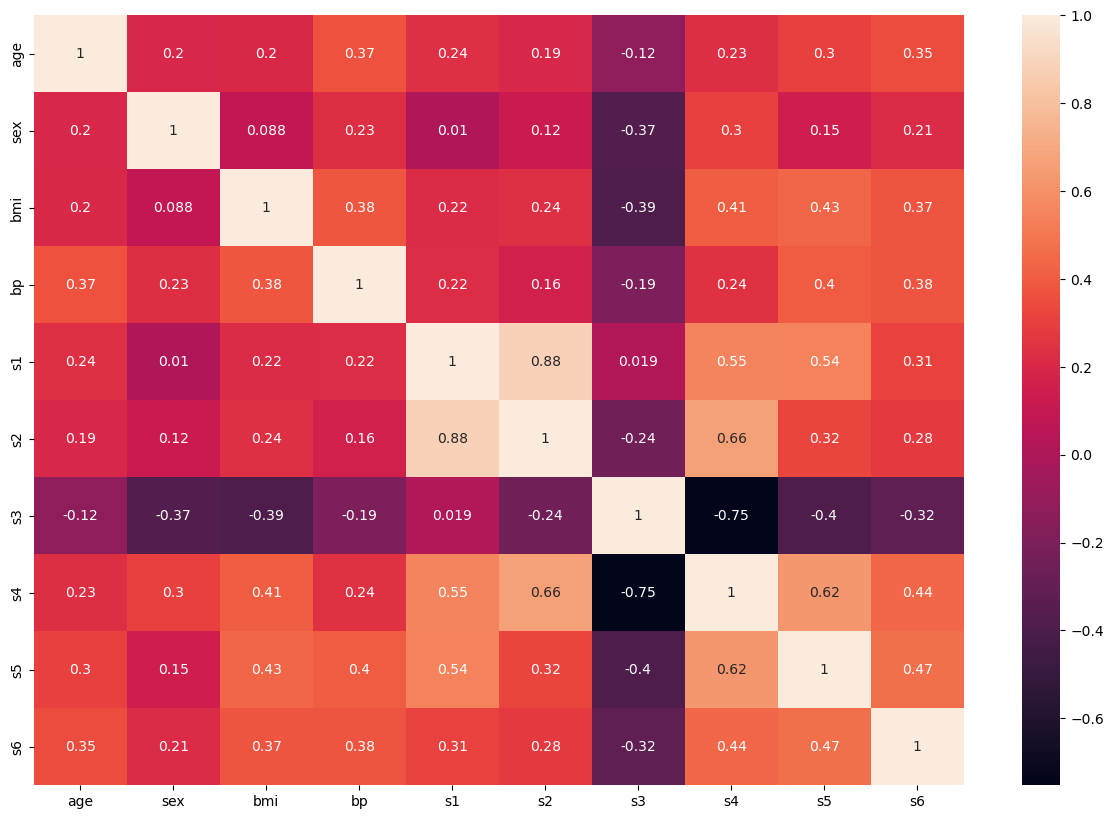

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(), annot=True)

In [12]:
# Importing the model and instantiatiing an instance
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

## Hyperparameter Tuning

In [13]:
params = {
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter': ['best', 'random'],
    'max_depth': [1,2,3,4,5,10,15,20,25],
    'max_features': ['auto','sqrt','log2'] 
}

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
regressor = DecisionTreeRegressor()

In [16]:
grid = GridSearchCV(regressor, param_grid=params, scoring='neg_mean_squared_error')

In [17]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [18]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [19]:
grid.best_score_

-3868.4395713696094

In [20]:
# Preds
y_pred = grid.predict(X_test)

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [22]:
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.38736747286197615
49.850303680078625
3829.682637464677


In [24]:
regressor_best_params = DecisionTreeRegressor(criterion='friedman_mse',
                                             max_depth=3,
                                             max_features='sqrt',
                                             splitter='random')

In [25]:
regressor_best_params.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      max_features='sqrt', splitter='random')

[Text(0.4583333333333333, 0.875, 'x[3] <= -0.003\nfriedman_mse = 5845.82\nsamples = 353\nvalue = 152.918'),
 Text(0.25, 0.625, 'x[9] <= 0.108\nfriedman_mse = 4273.516\nsamples = 182\nvalue = 126.676'),
 Text(0.16666666666666666, 0.375, 'x[2] <= -0.014\nfriedman_mse = 4095.892\nsamples = 181\nvalue = 125.624'),
 Text(0.08333333333333333, 0.125, 'friedman_mse = 1950.503\nsamples = 101\nvalue = 102.248'),
 Text(0.25, 0.125, 'friedman_mse = 5243.494\nsamples = 80\nvalue = 155.138'),
 Text(0.3333333333333333, 0.375, 'friedman_mse = 0.0\nsamples = 1\nvalue = 317.0'),
 Text(0.6666666666666666, 0.625, 'x[3] <= 0.015\nfriedman_mse = 6006.234\nsamples = 171\nvalue = 180.848'),
 Text(0.5, 0.375, 'x[7] <= 0.087\nfriedman_mse = 4554.771\nsamples = 51\nvalue = 141.333'),
 Text(0.4166666666666667, 0.125, 'friedman_mse = 4181.604\nsamples = 48\nvalue = 137.646'),
 Text(0.5833333333333334, 0.125, 'friedman_mse = 6826.889\nsamples = 3\nvalue = 200.333'),
 Text(0.8333333333333334, 0.375, 'x[7] <= 0.034\n

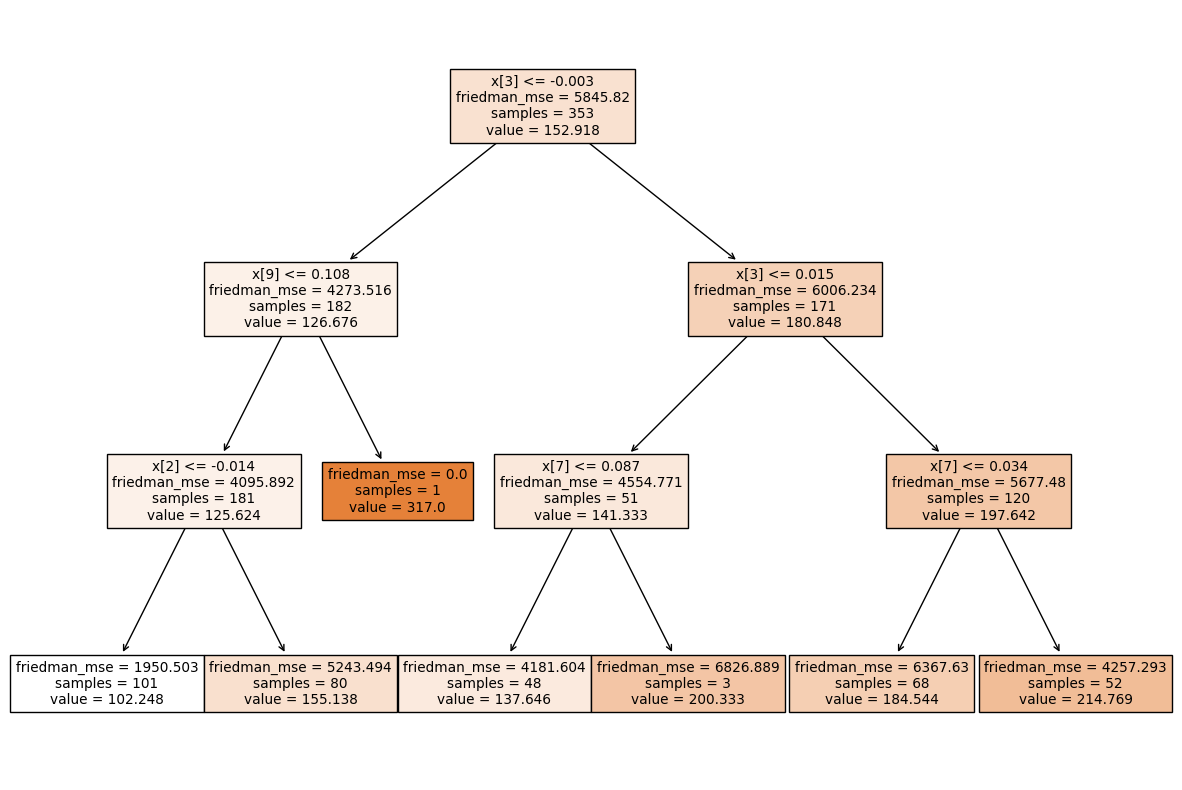

In [26]:
# Visualise the tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(regressor_best_params, filled=True)